# Health Analysis

In [1]:
%run analysis_functions.ipynb

In [2]:
df, arguments = read_clean_data()
sheet_id = arguments["sheet_id"]
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}"

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Cervical mucus charting

In [ ]:
chart = chart_cervical_mucus(
    df,
    with_text=False,
    outfile="charting",
)

### ![](charting.png)

In [ ]:
# Generate to save, but don't display
chart = chart_cervical_mucus(
    df,
    with_text=True,
    outfile="charting_with_text",
)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Current symptoms
- Severe pelvic pain
- Severe stomach pain when empty
- Abdominal bloating, tightness, and stabbing pains, esp. on right side
- Nausea in morning
- Frequent loose and painful BMs
- Frequent urination, painful bladder, white clouds in urine
- Near-daily headaches
- Painful joints (fingers, wrists, ankles, knee), swollen index finger
- Fatigue
- Occassional hypoglycemia: shaky and weak if I miss a meal
- Low libido

## Symptoms, quantified

In [27]:
numeric_metrics = [
    "BMs",
    "previous night Oura score",
    "steps",
]

categorical_metrics = [
    "pelvic pain",
    "stomach pain",
    "fatigue",
    "headache",
    "uncomfortable stomach",
    "bloated stomach_bool",
    "diarrhea_bool",
    "nausea",
    "white clouds in urine",
]

In [28]:
# last N days, excluding most recent, incomplete day
last_n_days = 30
start_dt = df[- last_n_days - 1: -1].index.min()
end_dt = df[- last_n_days - 1: -1].index.max()
min_pain = 4

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
    min_pain=min_pain,
)
print(summary)

03/10/24 - 04/08/24

83% of days had uncomfortable stomach.
83% of days had bloated stomach.
77% of days had headache.
57% of days had fatigue.
43% of days had stomach pain at least 5 / 10.
43% of days had pelvic pain at least 5 / 10.
27% of days had nausea.
23% of days had diarrhea.
20% of days had white clouds in urine.

3 BMs / day
88 / 100 sleep score
9,738 steps / day



In [29]:
# Right before second surgery
start_dt = datetime.datetime(2023, 9, 1)
end_dt = datetime.datetime(2023, 9, 26)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Medications

In [3]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 1

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

04/13/24

8 mg CBD
8 mg THC
40 mg Omeprazole
1500 mg Acetaminophen
200 mg Magnesium Lysinate Glycinate Chelate
1000 mg fish oil
25 mg DHEA
50 mg Pycnogenol
4000 mg Myo-Inositol
1000 mg Metformin
25 mg Mirabegron
250 mg Vitamin B6
1000 mcg Vitamin B12
4000 IU Vitamin D3



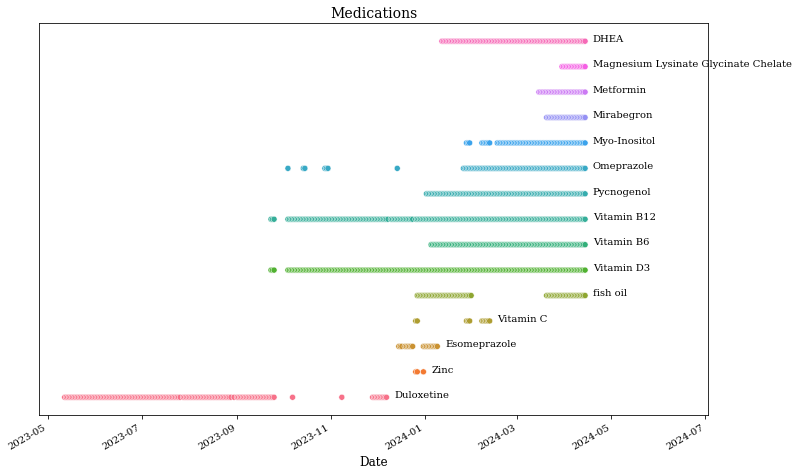

In [4]:
plot_meds_over_time(df)

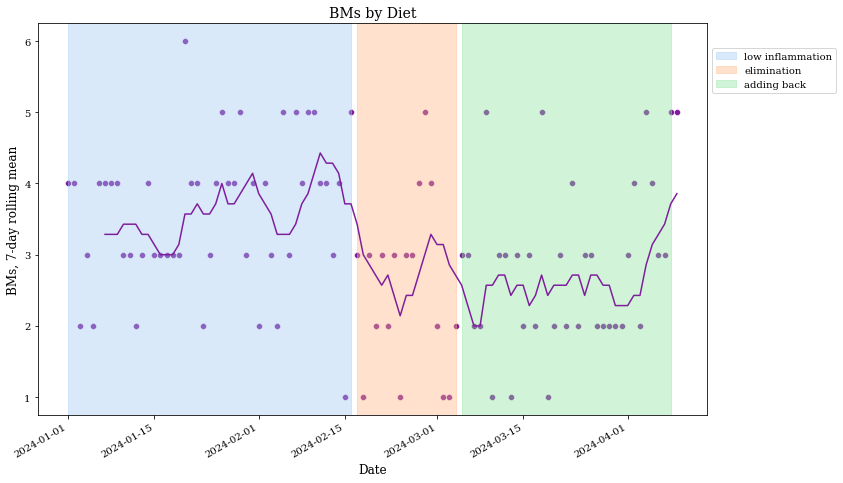

In [71]:
diets = ["low inflammation", "elimination", "adding back"]
df, metric_data, diet_data, metrics_dict = get_diet_data(df, diets)
start_dt = pd.datetime(2024, 1, 1)
end_dt = df.index[-2]
rolling_days = 7

metrics = [
    "BMs",
]
for metric in metrics:
    plot_diet_metric(
        metric,
        df,
        diet_data,
        start_dt,
        end_dt,
        rolling_days=rolling_days,
        include_scatter=True,
    )

In [ ]:
## T-tests comparing diets

# control_diet = "elimination"
# other_diets = ["low inflammation", "adding back"]

# # remove transition period, before diet can have an effect
# transition_days = 14

# for other_diet in other_diets:
#     print(f"{other_diet} vs. {control_diet}")
    
#     control = df[df["diet name"] == control_diet][transition_days:]
#     other = df[df["diet name"] == other_diet][transition_days:]

#     for metric in metrics:
#         stat, p = ttest_ind(
#             other[metric].dropna(),
#             control[metric].dropna(),
#         )
#         ratio = other[metric].mean() / control[metric].mean()
        
#         metric_str = metric.replace("_bool", "")
#         print(f"{metric_str}: {round(stat, 2)}, p={round(p, 3)}")

#     print()